In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from numpy import inf
from scipy.stats import moment
import pickle

target_rank = 'silver players'

In [7]:
with open('silver_df_clean.pickle', 'rb') as handle:
    df_clean = pickle.load(handle)
    
with open('silver_kmean.pickle', 'rb') as handle:
    dict_kmean = pickle.load(handle)

In [12]:
df_labeled = dict_kmean['label']
count_label0 = list(df_labeled).count(0)
count_label1 = list(df_labeled).count(1)
count_label2 = list(df_labeled).count(2)

print('cluster:\tsize:\t')
print('{}\t\t{}\t{}'.format(0, count_label0, count_label0*100/len(df_labeled)))
print('{}\t\t{}\t{}'.format(1, count_label1, count_label1*100/len(df_labeled)))
print('{}\t\t{}\t{}'.format(2, count_label2, count_label2*100/len(df_labeled)))

cluster:	size:	
0		10839	75.44372520359157
1		3473	24.17345305213336
2		55	0.3828217442750748


In [11]:
df_labeled = dict_kmean['label']
len(df_labeled)

14367

# Correlation

## pearson

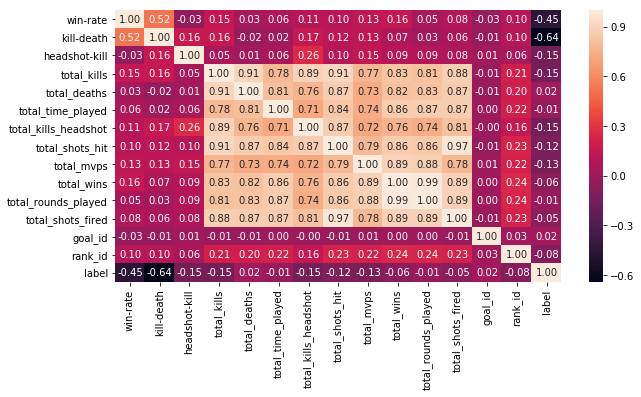

In [18]:
df_corr = df_clean.corr('pearson')

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_corr, ax=ax, annot=True, annot_kws={"size": 10}, fmt=".2f")
plt.savefig('{}_pearson.png'.format(target_rank))
plt.show()

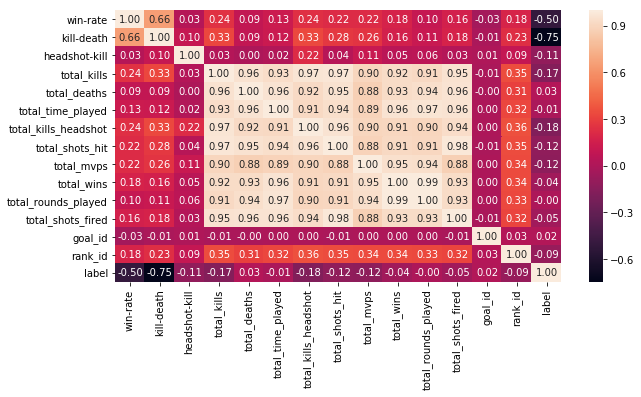

In [19]:
df_corr = df_clean.corr('spearman')

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_corr, ax=ax, annot=True, annot_kws={"size": 10}, fmt=".2f")
plt.savefig('{}_spearman.png'.format(target_rank))
plt.show()

# analyze feature distribution

In [20]:
def analyze_feat_dist( data ):
    m = round(max(data), 1)
    avg = round(np.mean(data),1)
    skew = moment(data, 3)/(np.std(data))**3
    kurt = moment(data, 4)/(np.std(data))**4    
    return m,avg,skew,kurt

In [21]:
df_clean.total_time_played.values

array([1426823, 1331496,  534943, ...,    9800,  165595,    9229])

In [22]:
label_index_dict = {}
df_labeled = dict_kmean['label']
label_index_dict[0] = [i for i in range(len(df_labeled)) if df_labeled[i]==0]
label_index_dict[1] = [i for i in range(len(df_labeled)) if df_labeled[i]==1]
label_index_dict[2] = [i for i in range(len(df_labeled)) if df_labeled[i]==2]

label_df_dict = {}
label_df_dict[0] = df_clean.iloc[label_index_dict[0]]
label_df_dict[1] = df_clean.iloc[label_index_dict[1]]
label_df_dict[2] = df_clean.iloc[label_index_dict[2]]

cluster 0:max = 715.5	average=81.1	skew=3.3	kurt=16.8
cluster 1:max = 9575.4	average=232.7	skew=12.5	kurt=322.3
cluster 2:max = 5006.1	average=219.2	skew=4.0	kurt=51.0
cluster all:max = 9575.4	average=222.0	skew=8.3	kurt=225.3


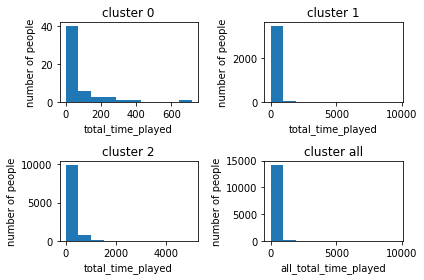

In [73]:
label_index_dict = {}
df_labeled = dict_kmean['label']
label_index_dict[0] = [i for i in range(len(df_labeled)) if df_labeled[i]==0]
label_index_dict[1] = [i for i in range(len(df_labeled)) if df_labeled[i]==1]
label_index_dict[2] = [i for i in range(len(df_labeled)) if df_labeled[i]==2]

label_df_dict = {}
label_df_dict[0] = df_clean.iloc[label_index_dict[0]]
label_df_dict[1] = df_clean.iloc[label_index_dict[1]]
label_df_dict[2] = df_clean.iloc[label_index_dict[2]]

plt.figure()

def analyze_feature_of_cluster(cluster, feat):
    if feat == 'total_time_played':
        data = label_df_dict[cluster].total_time_played.values/3600
    
    elif feat == 'avg_kill_per_round':
        data = label_df_dict[cluster]['total_kills']/label_df_dict[cluster]['total_rounds_played']


    elif feat == 'headshot_per_round':
        data = label_df_dict[cluster]['total_kills_headshot']/label_df_dict[cluster]['total_rounds_played']
        
    elif feat == 'total_mvps':
        data = label_df_dict[cluster]['total_rounds_played']/label_df_dict[cluster]['total_mvps']
        data = data.fillna(0)
    
    elif feat == 'all_total_time_played':
        data = df_clean.total_time_played.values/3600
        cluster = 'all'
    elif feat == 'all_avg_kill':
        data = df_clean['total_kills']/df_clean['total_rounds_played']
        cluster = 'all'
        
    elif feat == 'all_avg_headshot':
        data = df_clean['total_kills_headshot']/df_clean['total_rounds_played']
        cluster = 'all'
    elif feat == 'all_avg_mvps':
        data = df_clean['total_rounds_played']/df_clean['total_mvps']
        data = data.fillna(0)
        cluster = 'all'
    
    m,avg,skew,kurt = analyze_feat_dist(data) 
    plt.hist(data)
    plt.xlabel(feat)
    plt.ylabel('number of people')
    plt.title('cluster {}'.format(cluster))
    print('cluster {}:max = {}\taverage={}\tskew={}\tkurt={}'.format(cluster, m, avg, round(skew,1), round(kurt,1)))

plt.subplot(2,2,1)
feat = 'total_time_played'
analyze_feature_of_cluster(0,feat )

plt.subplot(2,2,2)
analyze_feature_of_cluster(1,feat)

plt.subplot(2,2,3)
analyze_feature_of_cluster(2,feat)

plt.subplot(2,2,4)
analyze_feature_of_cluster(2,'all_total_time_played')

plt.tight_layout()
plt.savefig('{}_{}.png'.format(target_rank, feat))


plt.show()

cluster 0:max = 8.2	average=3.6	skew=0.6	kurt=2.2
cluster 1:max = 8.9	average=1.6	skew=3.5	kurt=21.5
cluster 2:max = 8.6	average=1.1	skew=4.2	kurt=32.1
cluster all:max = 8.9	average=1.2	skew=3.8	kurt=26.1


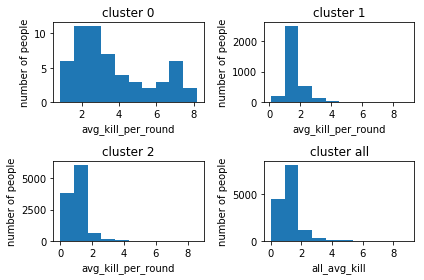

In [70]:
plt.figure()
plt.subplot(2,2,1)
feat = 'avg_kill_per_round'
analyze_feature_of_cluster(0,feat)

plt.subplot(2,2,2)
analyze_feature_of_cluster(1,feat)

plt.subplot(2,2,3)
analyze_feature_of_cluster(2,feat)

plt.subplot(2,2,4)
analyze_feature_of_cluster(2,'all_avg_kill')


plt.tight_layout()
plt.savefig('{}_{}.png'.format(target_rank, feat))


plt.show()


cluster 0:max = 6.5	average=1.9	skew=1.3	kurt=3.5
cluster 1:max = 4.8	average=0.5	skew=4.0	kurt=29.9
cluster 2:max = 7.0	average=0.3	skew=7.8	kurt=166.4
cluster all:max = 7.0	average=0.4	skew=7.3	kurt=102.6


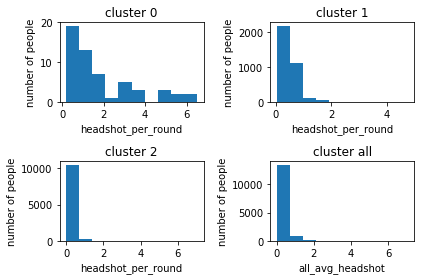

In [71]:
plt.figure()
plt.subplot(2,2,1)
feat = 'headshot_per_round'
analyze_feature_of_cluster(0,feat)

plt.subplot(2,2,2)
analyze_feature_of_cluster(1,feat)

plt.subplot(2,2,3)
analyze_feature_of_cluster(2,feat)

plt.subplot(2,2,4)
analyze_feature_of_cluster(3,'all_avg_headshot')

plt.tight_layout()
plt.savefig('{}_{}.png'.format(target_rank, feat))

plt.show()

cluster 0:max = 43.3	average=6.6	skew=3.0	kurt=15.4
cluster 1:max = 132.7	average=7.6	skew=12.7	kurt=397.2
cluster 2:max = 245.0	average=11.1	skew=12.7	kurt=288.8
cluster all:max = 245.0	average=10.3	skew=13.0	kurt=315.5


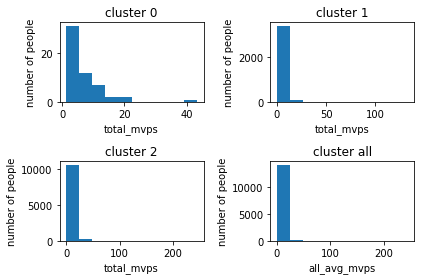

In [74]:
plt.figure()
plt.subplot(2,2,1)
feat = 'total_mvps'
analyze_feature_of_cluster(0,feat)

plt.subplot(2,2,2)
analyze_feature_of_cluster(1,feat)

plt.subplot(2,2,3)
analyze_feature_of_cluster(2,feat)

plt.subplot(2,2,4)
analyze_feature_of_cluster(3,'all_avg_mvps')

plt.tight_layout()
plt.savefig('{}_{}.png'.format(target_rank, feat))


plt.show()

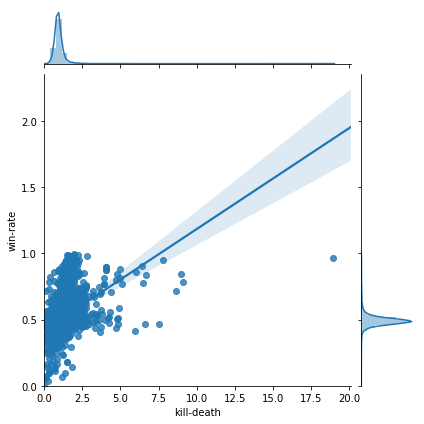

In [75]:
sns.JointGrid("kill-death","win-rate",df_clean).plot(sns.regplot, sns.distplot)
plt.xlim((0, None))
plt.ylim((0, None))
plt.show()

cluster 0


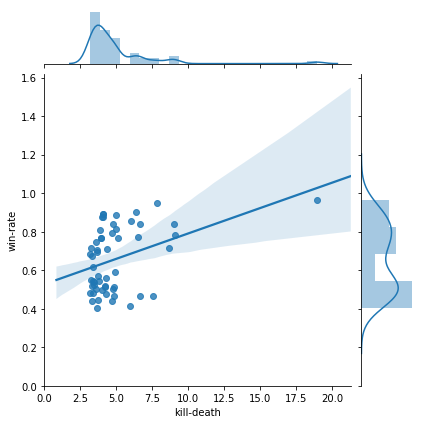

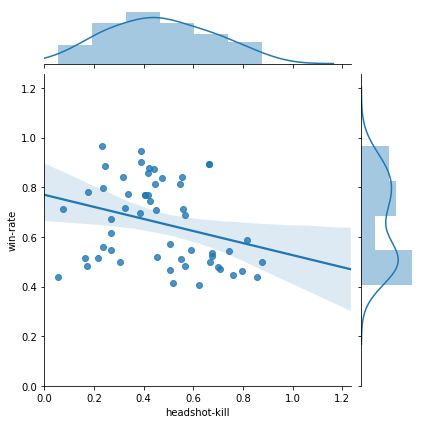

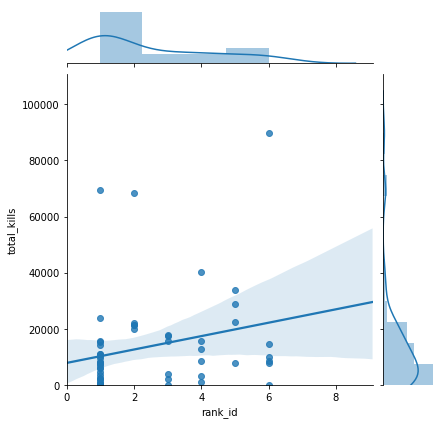

cluster 1


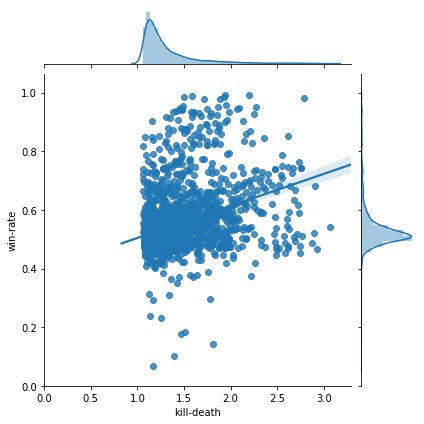

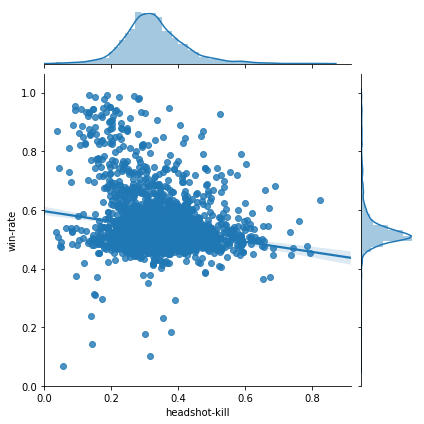

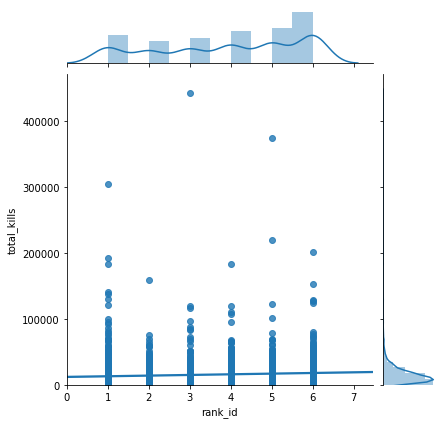

cluster 2


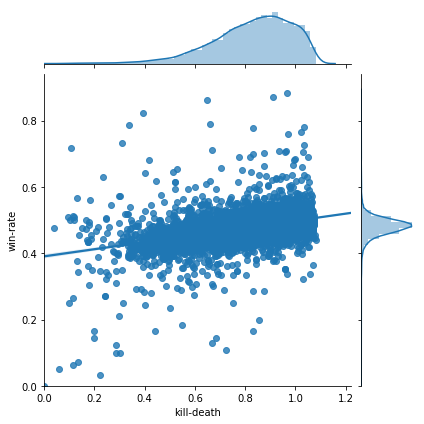

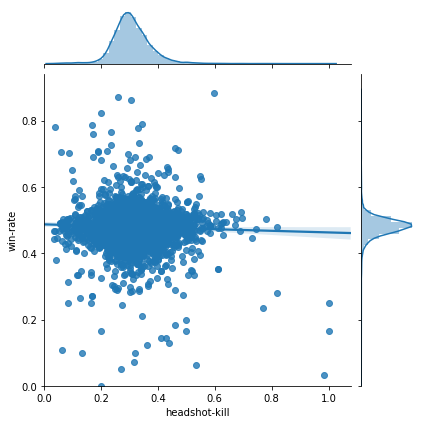

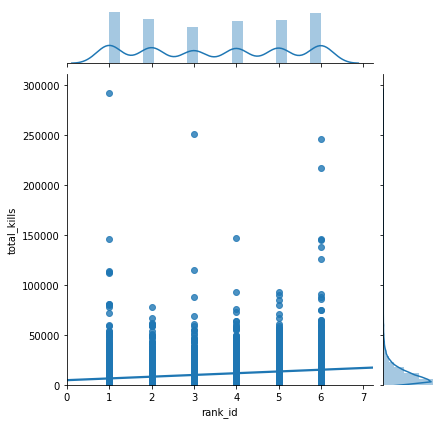

In [14]:
    sns.JointGrid("kill-death","win-rate",label_df_dict[i]).plot(sns.regplot, sns.distplot)
    plt.xlim((0, None))
    plt.ylim((0, None))
    plt.show()



for i in label_df_dict.keys():
    print('cluster {}'.format(i))
    sns.JointGrid("kill-death","win-rate",label_df_dict[i]).plot(sns.regplot, sns.distplot)
    plt.xlim((0, None))
    plt.ylim((0, None))
    plt.show()


    sns.JointGrid("headshot-kill","win-rate",label_df_dict[i]).plot(sns.regplot, sns.distplot)
    plt.xlim((0, None))
    plt.ylim((0, None))
    plt.show()
    
    sns.JointGrid("rank_id","total_kills",label_df_dict[i]).plot(sns.regplot, sns.distplot)
    plt.xlim((0, None))
    plt.ylim((0, None))
    plt.show()